In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from scipy.stats import zscore, pearsonr, uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV

from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

EDA

In [6]:
#Load files
test_categorical = pd.read_excel('/Users/HEY/WiDS2025/TEST/TEST_CATEGORICAL.xlsx')
test_FCM = pd.read_csv('/Users/HEY/WiDS2025/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv')
test_quantitative = pd.read_excel('/Users/HEY/WiDS2025/TEST/TEST_QUANTITATIVE_METADATA.xlsx')
train_categorical_new = pd.read_excel('/Users/HEY/WiDS2025/TRAIN_NEW/TRAIN_CATEGORICAL_METADATA_new.xlsx')
train_FCM_new = pd.read_csv('/Users/HEY/WiDS2025/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv')
train_quantitative_new = pd.read_excel('/Users/HEY/WiDS2025/TRAIN_NEW/TRAIN_QUANTITATIVE_METADATA_new.xlsx')
train_categorical_old = pd.read_excel('/Users/HEY/WiDS2025/TRAIN_OLD/TRAIN_CATEGORICAL_METADATA.xlsx')
train_FCM_old = pd.read_csv('/Users/HEY/WiDS2025/TRAIN_OLD/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv')
train_quantitative_old = pd.read_excel('/Users/HEY/WiDS2025/TRAIN_OLD/TRAIN_QUANTITATIVE_METADATA.xlsx')

In [32]:
test_categorical.info()
test_categorical.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    304 non-null    object 
 1   Basic_Demos_Enroll_Year           304 non-null    int64  
 2   Basic_Demos_Study_Site            304 non-null    int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  301 non-null    float64
 4   PreInt_Demos_Fam_Child_Race       298 non-null    float64
 5   MRI_Track_Scan_Location           304 non-null    int64  
 6   Barratt_Barratt_P1_Edu            303 non-null    float64
 7   Barratt_Barratt_P1_Occ            303 non-null    float64
 8   Barratt_Barratt_P2_Edu            268 non-null    float64
 9   Barratt_Barratt_P2_Occ            262 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 23.9+ KB


<bound method NDFrame.head of     participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
0     Cfwaf5FX7jWK                     2022                       4   
1     vhGrzmvA3Hjq                     2023                       4   
2     ULliyEXjy4OV                     2022                       4   
3     LZfeAb1xMtql                     2022                       4   
4     EnFOUv0YK1RG                     2022                       4   
..             ...                      ...                     ...   
299   UadZfjdEg7eG                     2023                       4   
300   IUEHiLmQAqCi                     2023                       4   
301   cRySmCadYFRO                     2023                       4   
302   E3MvDUtJadc5                     2022                       4   
303   dQJXfyRazknD                     2022                       4   

     PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
0                                 0.0          

In [ ]:
train_categorical_new.info()
train_categorical_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1170 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1159 non-null   float64
 5   MRI_Track_Scan_Location           1210 non-null   float64
 6   Barratt_Barratt_P1_Edu            1198 non-null   float64
 7   Barratt_Barratt_P1_Occ            1182 non-null   float64
 8   Barratt_Barratt_P2_Edu            1015 non-null   float64
 9   Barratt_Barratt_P2_Occ            991 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 94.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212


as we checked both files have same columns, we can simly use concat. 

In [7]:
data_dic = pd.read_excel('/Users/HEY/WiDS2025/Data Dictionary.xlsx')

In [50]:
data_dic

,DataType,Instrument,Field,Description,Type,Labels
0,QUANTITATIVE METADATA,NaN,NaN,NaN,NaN,NaN
1,NaN,Identifier,participant_id,Participant ID,str,NaN
2,Quantitative,Edinburgh Handedness Questionnaire,EHQ_EHQ_Total,Laterality Index (Score),float,-100 = 10th left\n−28 ≤ LI < 48 = middle\n100 ...
3,Quantitative,Ishihara Color Vision Test,ColorVision_CV_Score,Color vision test score,int,NaN
4,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_CP,Corporal Punishment Score,int,NaN
5,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_ID,Inconsistent Discipline Score,int,NaN
6,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_INV,Involvement Score,int,NaN
7,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_OPD,Other Discipline Practices Score (Not factored...,int,NaN
8,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_PM,Poor Monitoring/Supervision Score,int,NaN
9,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_PP,Positive Parenting Score,int,NaN


In [10]:
train_cat = pd.concat([train_categorical_new, train_categorical_old], axis=0)
train_FCM = pd.concat([train_FCM_new, train_FCM_old], axis=0)
train_qnt = pd.concat([train_quantitative_new, train_quantitative_old], axis=0)

In [11]:
train_solutions_new = pd.read_excel('/Users/HEY/WiDS2025/TRAIN_NEW/TRAINING_SOLUTIONS.xlsx')
train_solutions_old = pd.read_excel('/Users/HEY/WiDS2025/TRAIN_OLD/TRAINING_SOLUTIONS.xlsx')
train_sol = pd.concat([train_solutions_new, train_solutions_old], axis=0)

# EDA

## 1. Categorical

In [12]:
train_cat.info()
train_cat.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2426 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    2426 non-null   object 
 1   Basic_Demos_Enroll_Year           2426 non-null   int64  
 2   Basic_Demos_Study_Site            2426 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  2372 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       2372 non-null   float64
 5   MRI_Track_Scan_Location           2423 non-null   float64
 6   Barratt_Barratt_P1_Edu            2411 non-null   float64
 7   Barratt_Barratt_P1_Occ            2395 non-null   float64
 8   Barratt_Barratt_P2_Edu            2228 non-null   float64
 9   Barratt_Barratt_P2_Occ            2204 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 208.5+ KB


,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,00aIpNTbG5uh,2019,4,1.0,0.0,3.0,21.0,45.0,NaN,NaN
1,00fV0OyyoLfw,2017,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0
2,04X1eiS79T4B,2017,1,1.0,2.0,2.0,9.0,0.0,NaN,NaN
3,05ocQutkURd6,2018,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0
4,06YUNBA9ZRLq,2018,1,0.0,1.0,2.0,12.0,0.0,NaN,NaN


In [ ]:
#plot_cols = ['PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'Barratt_Barratt_P1_Edu','Barratt_Barratt_P1_Occ','Barratt_Barratt_P2_Edu','Barratt_Barratt_P2_Occ']

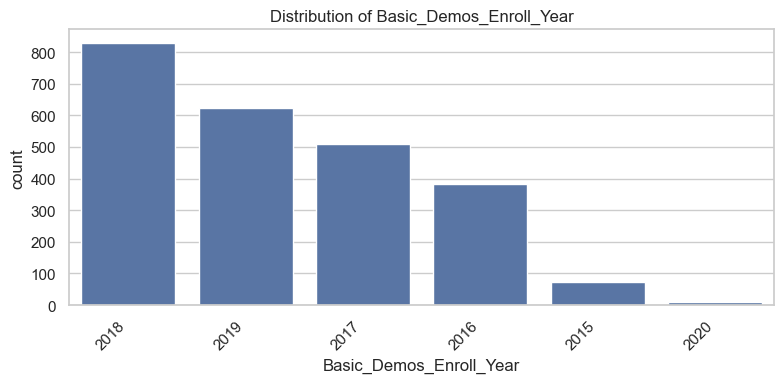

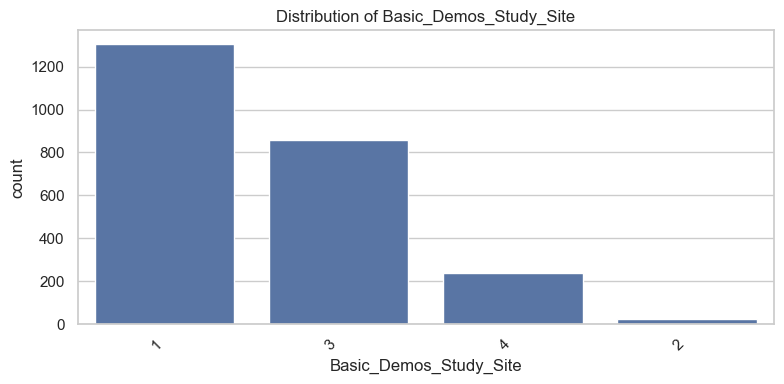

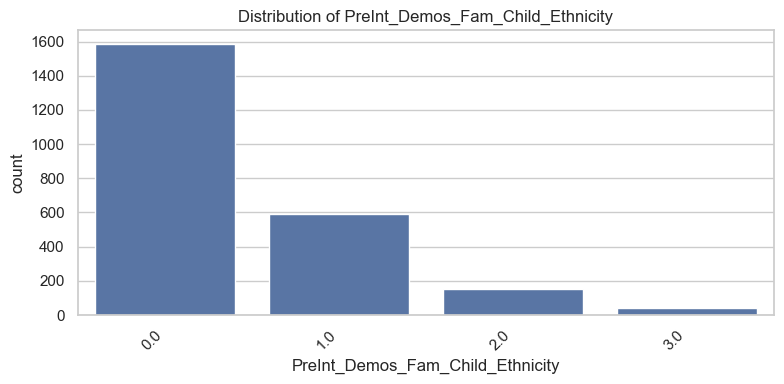

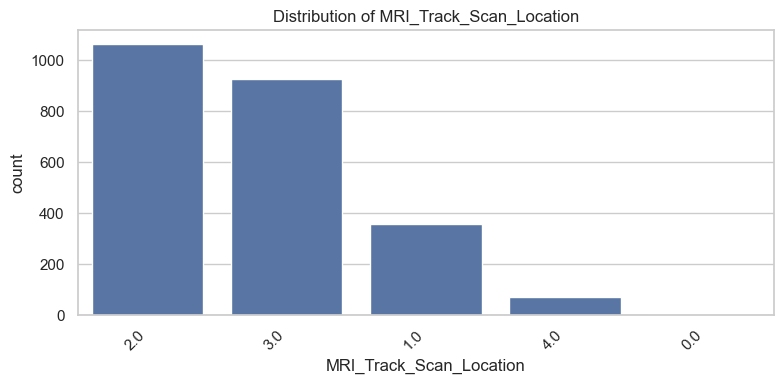

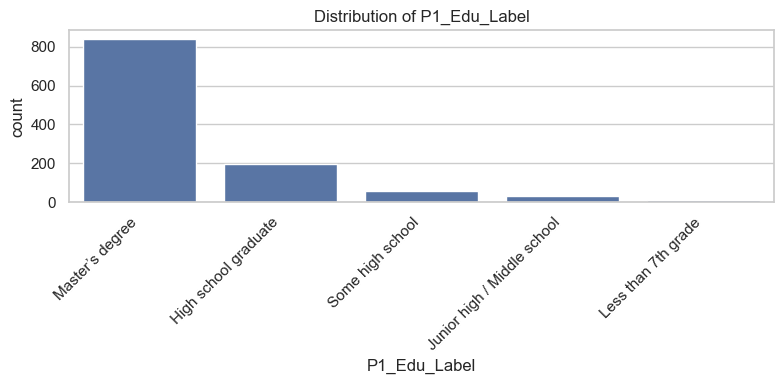

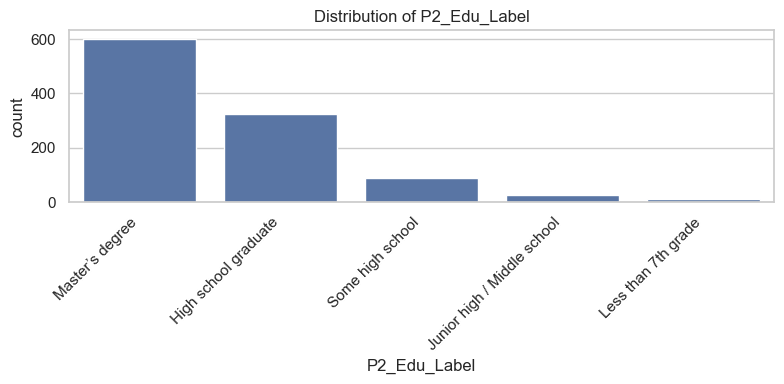

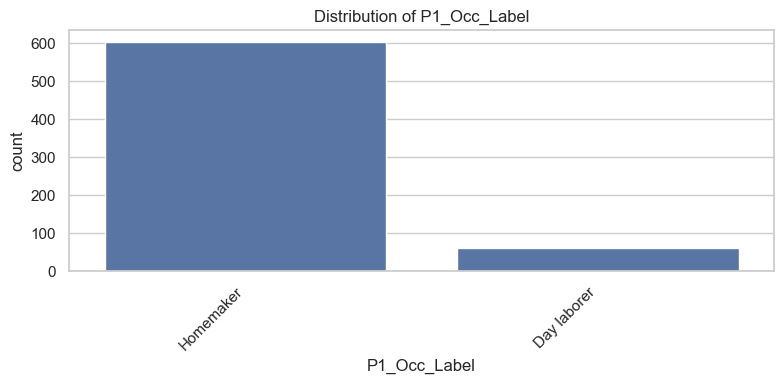

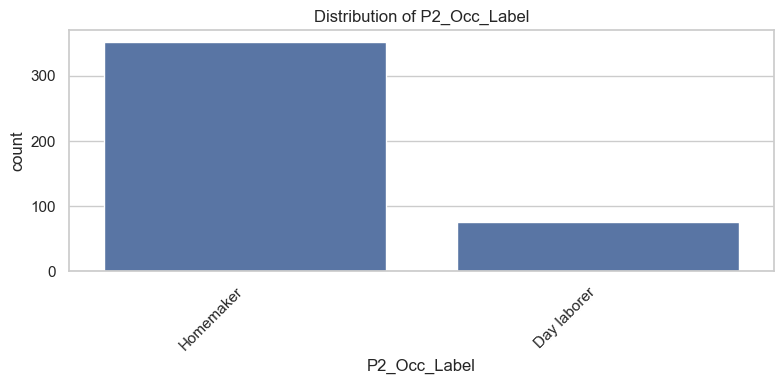

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns to plot
cat_cols = [
    'Basic_Demos_Enroll_Year',
    'Basic_Demos_Study_Site',
    'PreInt_Demos_Fam_Child_Ethnicity',
    'MRI_Track_Scan_Location',
    'P1_Edu_Label',
    'P2_Edu_Label',
    'P1_Occ_Label',
    'P2_Occ_Label'
]

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    
    # Clean data before plotting
    tmp = train_cat[[col]].dropna()
    tmp[col] = tmp[col].astype(str)
    order = tmp[col].value_counts().index
    
    sns.countplot(data=tmp, x=col, order=order)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


### Check Association: Cramer's V Function

In [39]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.shape[0] < 2 or confusion_matrix.shape[1] < 2:
        return np.nan  # skip invalid tables
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

In [40]:
# Merge target + categorical data
train_combined = train_cat.merge(train_sol, on='participant_id')

# Define categorical columns
cat_cols = [
    'Basic_Demos_Enroll_Year',
    'Basic_Demos_Study_Site',
    'PreInt_Demos_Fam_Child_Ethnicity',
    'MRI_Track_Scan_Location',
    'P1_Edu_Label',
    'P2_Edu_Label',
    'P1_Occ_Label',
    'P2_Occ_Label'
]

# Compute Cramér’s V for ADHD and Sex
results = {
    'Variable': [],
    'ADHD_Outcome': [],
    'Sex_F': []
}

for col in cat_cols:
    v_adhd = cramers_v(train_combined[col], train_combined['ADHD_Outcome'])
    v_sex = cramers_v(train_combined[col], train_combined['Sex_F'])
    results['Variable'].append(col)
    results['ADHD_Outcome'].append(v_adhd)
    results['Sex_F'].append(v_sex)

cramer_df = pd.DataFrame(results).set_index('Variable')

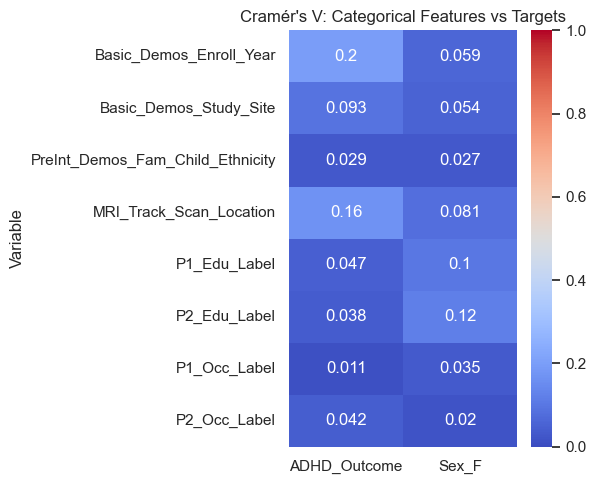

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(cramer_df, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V: Categorical Features vs Targets")
plt.tight_layout()
plt.show()

all the value is lower than 0.2, it's hard to their association is significant. but, we still keep them and do XGBoost later on.

### Encoding

## 2. Quantitative

In [ ]:
train_qnt.info()
train_qnt.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2426 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              2426 non-null   object 
 1   EHQ_EHQ_Total               2413 non-null   float64
 2   ColorVision_CV_Score        2403 non-null   float64
 3   APQ_P_APQ_P_CP              2414 non-null   float64
 4   APQ_P_APQ_P_ID              2414 non-null   float64
 5   APQ_P_APQ_P_INV             2414 non-null   float64
 6   APQ_P_APQ_P_OPD             2414 non-null   float64
 7   APQ_P_APQ_P_PM              2414 non-null   float64
 8   APQ_P_APQ_P_PP              2414 non-null   float64
 9   SDQ_SDQ_Conduct_Problems    2417 non-null   float64
 10  SDQ_SDQ_Difficulties_Total  2417 non-null   float64
 11  SDQ_SDQ_Emotional_Problems  2417 non-null   float64
 12  SDQ_SDQ_Externalizing       2417 non-null   float64
 13  SDQ_SDQ_Generating_Impact   2417 non-n

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
1,00fV0OyyoLfw,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
2,04X1eiS79T4B,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
3,05ocQutkURd6,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
4,06YUNBA9ZRLq,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574


In [50]:
train_qnt.columns[-1]

'MRI_Track_Age_at_Scan'

In [55]:
train_qnt = train_qnt.reset_index(drop=True)

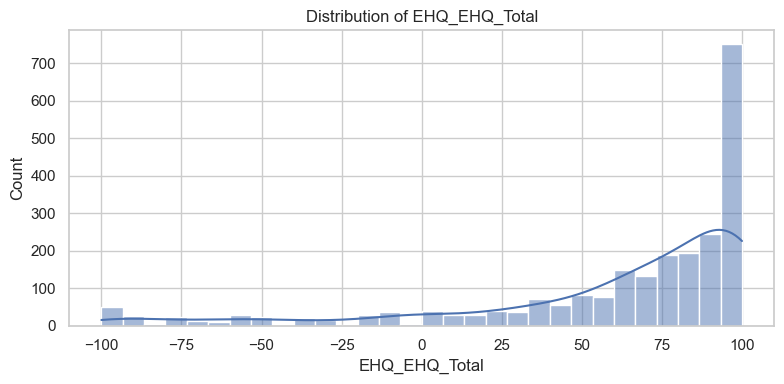

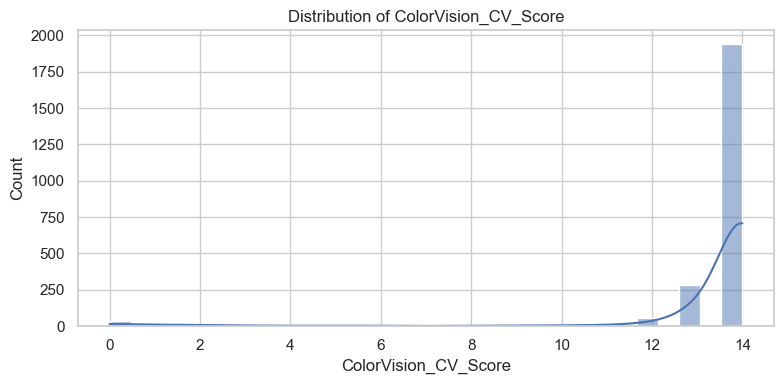

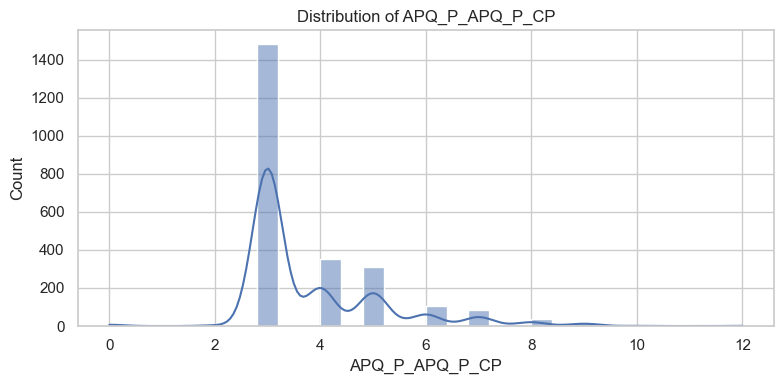

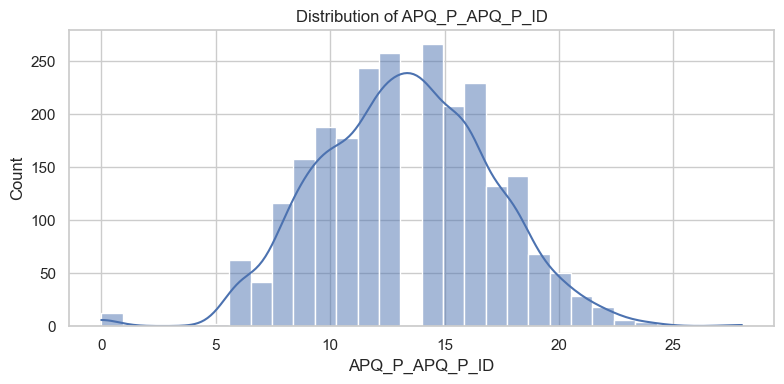

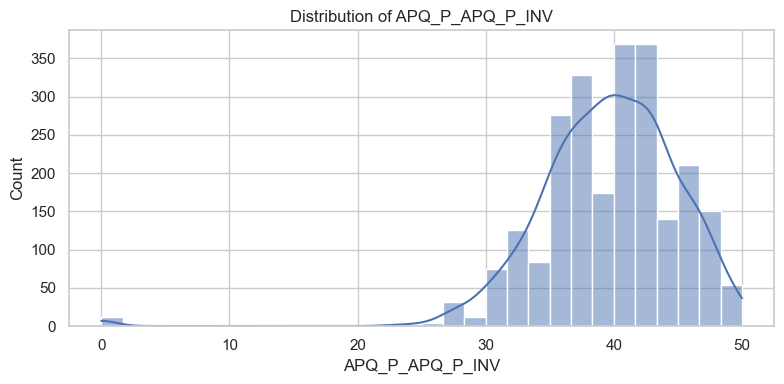

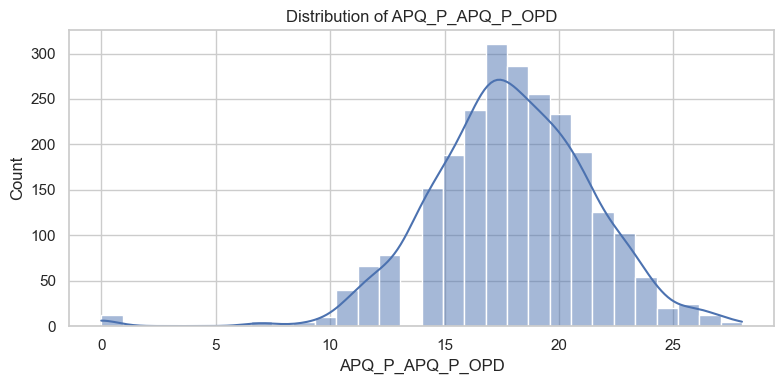

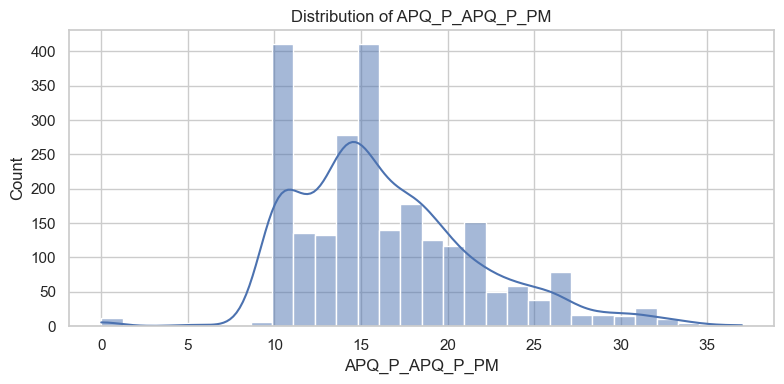

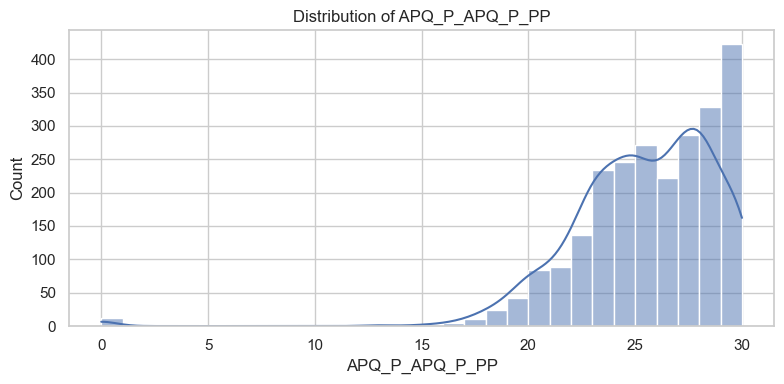

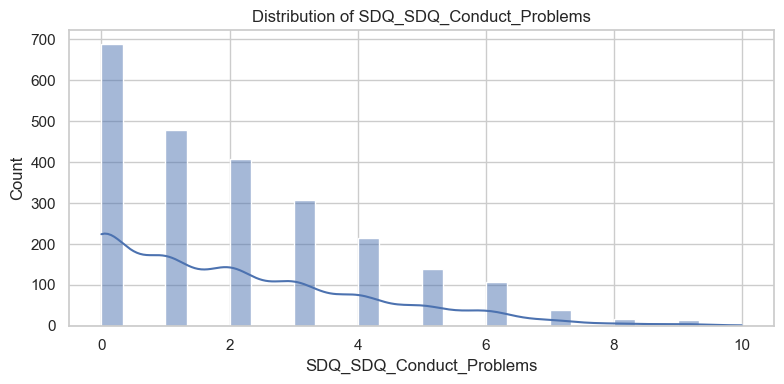

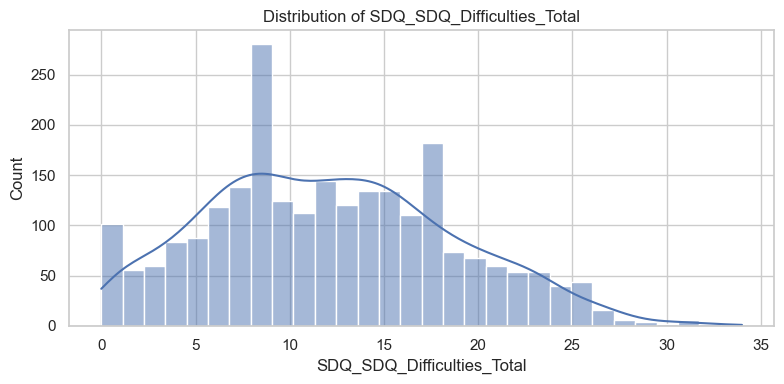

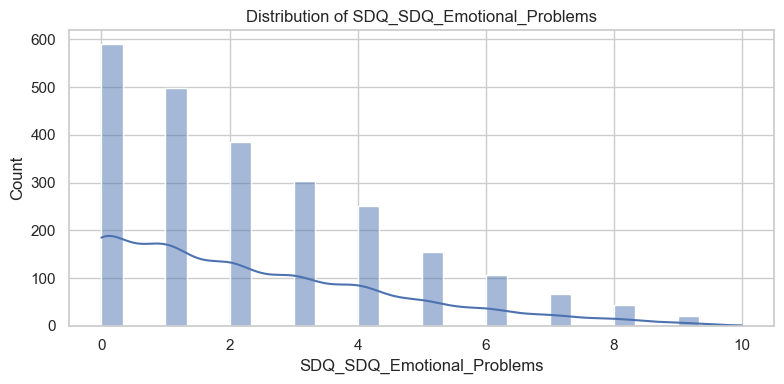

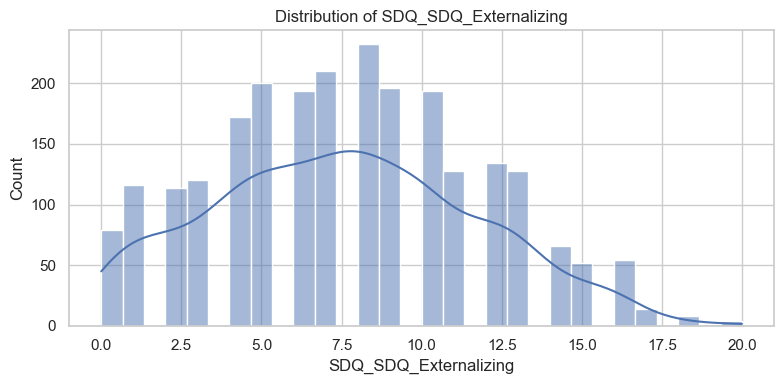

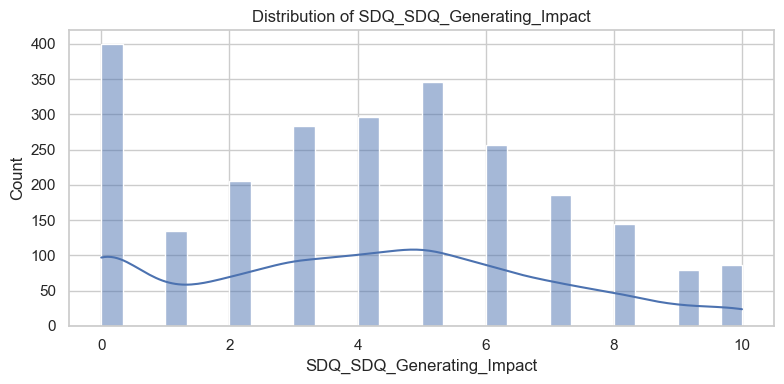

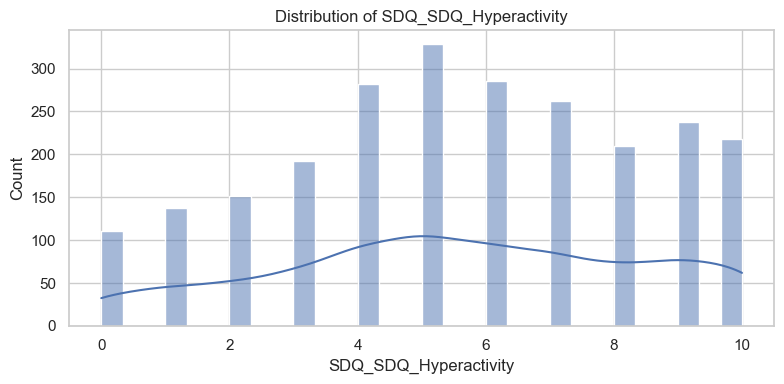

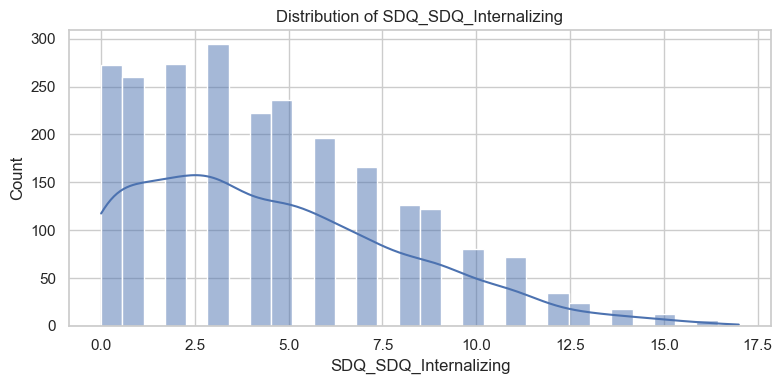

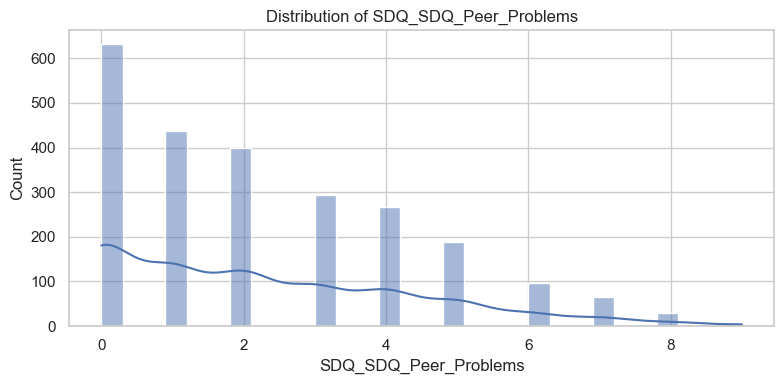

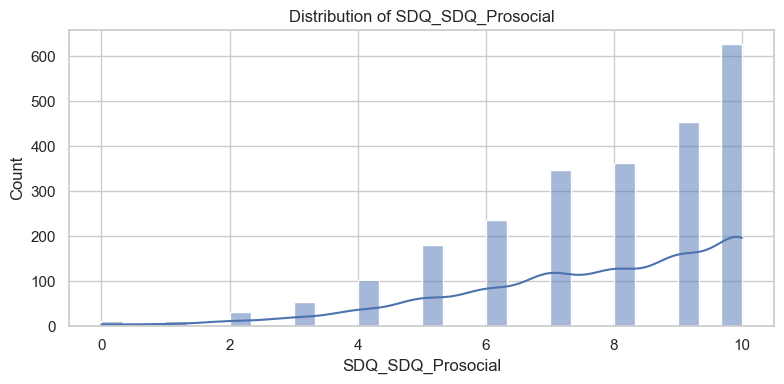

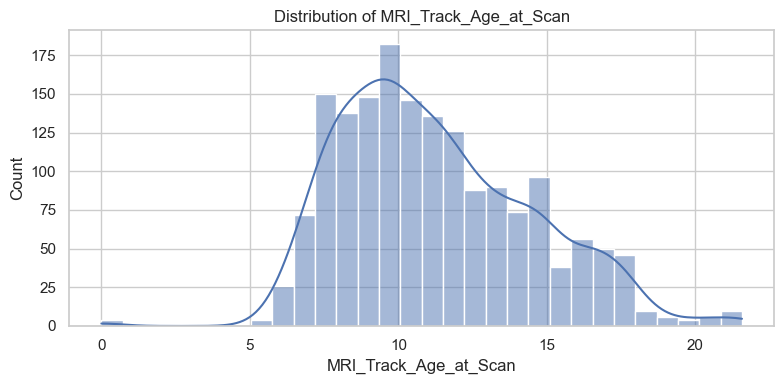

In [56]:

import seaborn as sns
import matplotlib.pyplot as plt

qnt_cols = train_qnt.columns[1:]  # 

for col in qnt_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=train_qnt, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


As it's distributed in different ranges, we better normalise before proceeding. (If we use Tree-based models such as Random Forest, XGBoost, LightGBM, it's not necessary tho)

## 3. FCM (Functional Connectome Matrices)

In [43]:
train_FCM.info()
train_FCM.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2426 entries, 0 to 1212
Columns: 19901 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19900), object(1)
memory usage: 368.4+ MB


,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.222930,0.527903,0.429966,0.060457,0.566489,0.315342,0.508408,-0.078290,0.525692,...,0.224985,0.397448,0.422966,0.184642,0.305549,0.420349,0.016328,0.561864,0.471170,0.365221
1,WHWymJu6zNZi,0.614765,0.577255,0.496127,0.496606,0.404686,0.439724,0.122590,-0.085452,0.120673,...,0.217546,-0.014549,0.000440,-0.096451,0.454501,0.343916,0.167313,0.607656,0.550623,0.503176
2,4PAQp1M6EyAo,-0.116833,0.458408,0.260703,0.639031,0.769337,0.442528,0.637110,0.192010,0.520379,...,0.342487,-0.021141,-0.037836,0.075069,0.412712,0.292708,0.391005,0.461544,0.508912,0.624232
3,obEacy4Of68I,0.199688,0.752714,0.658283,0.575096,0.692867,0.645789,0.522750,0.412188,0.530843,...,0.103562,-0.178313,0.210983,-0.018666,0.436313,0.592982,0.216205,0.341272,0.440313,0.558193
4,s7WzzDcmDOhF,0.227321,0.613268,0.621447,0.562673,0.736709,0.589813,0.266676,0.359668,0.300771,...,-0.164956,0.007064,-0.120904,-0.488095,0.493575,-0.215361,0.210685,0.055850,0.119065,0.108273


In [57]:
train_FCM.shape        # (2426, 19901)
train_FCM.isnull().mean().mean()  # average missingness rate

np.float64(0.0)

In [58]:
train_FCM['participant_id'].duplicated().sum()

np.int64(1213)

it has 2,426 rows(maybe training + test combined? > no, based on duplicate check)
19,901 columns = 1 participant_id + 19,900 flattened fMRL functional connectivity matrix values per subject

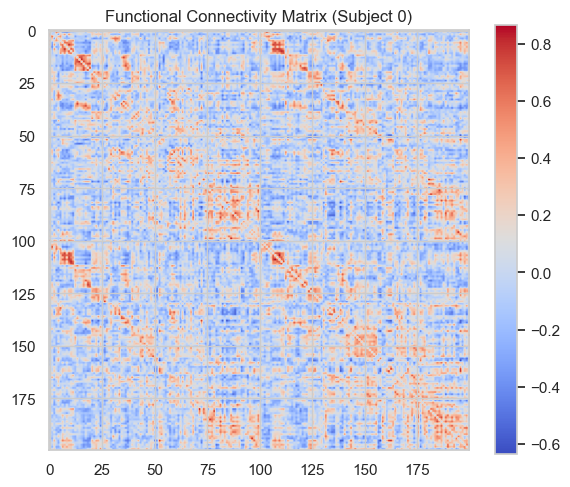

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Drop ID column
X_fcm = train_FCM.drop(columns='participant_id')

# Extract row vector
row = X_fcm.iloc[0].values  # Shape: (19900,)
n = 200

# Create empty symmetric matrix
mat = np.zeros((n, n))

# Fill upper triangle (excluding diagonal)
tri_indices = np.triu_indices(n, k=1)  # k=1 excludes the diagonal
mat[tri_indices] = row

# Mirror to lower triangle
mat += mat.T

# Plot
plt.figure(figsize=(6, 5))
plt.imshow(mat, cmap='coolwarm')
plt.title("Functional Connectivity Matrix (Subject 0)")
plt.colorbar()
plt.tight_layout()
plt.show()


Dimension Reduction via PCA

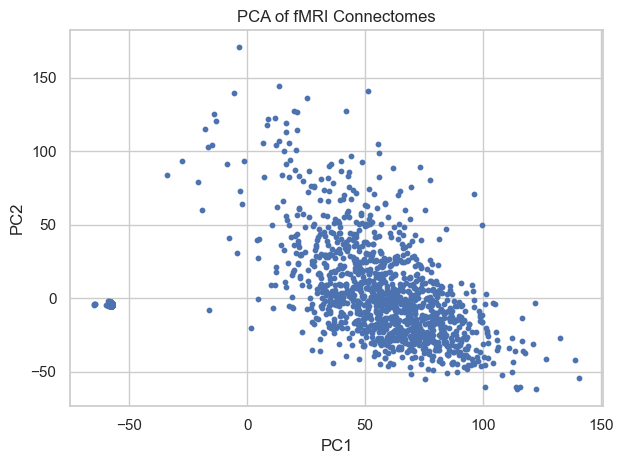

In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X_fcm)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10)
plt.title("PCA of fMRI Connectomes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()


<Axes: xlabel='PC1', ylabel='PC2'>

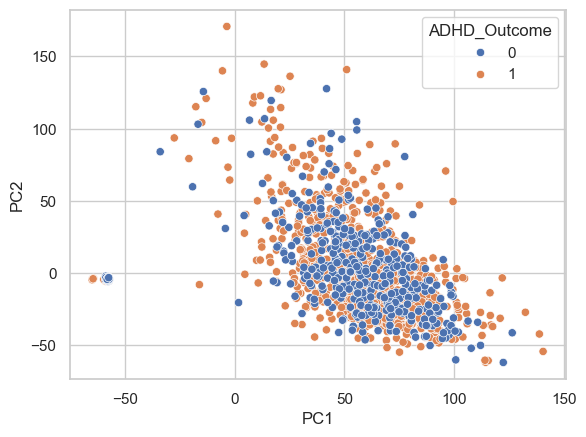

In [66]:
# distributed by ADHD
train_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
train_pca['ADHD_Outcome'] = train_sol['ADHD_Outcome'].values

sns.scatterplot(data=train_pca, x='PC1', y='PC2', hue='ADHD_Outcome')


## 4. Targets

In [25]:
train_sol.info()
train_sol.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2426 entries, 0 to 1212
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  2426 non-null   object
 1   ADHD_Outcome    2426 non-null   int64 
 2   Sex_F           2426 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 75.8+ KB


,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


<Axes: xlabel='ADHD_Outcome', ylabel='count'>

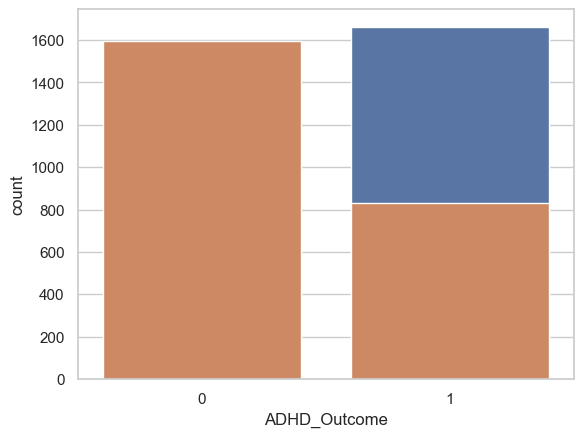

In [26]:
sns.countplot(x='ADHD_Outcome', data=train_sol)
sns.countplot(x='Sex_F', data=train_sol)

It's imbalanced - what do we do?